In [63]:
import numpy as np
import pandas as pd
from plotnine import*

In [ ]:
pd.read_csv('tr_data_22_24.csv')

,site,mode,division,region,destination,shipping_date,invoice_date,usda_invoice_amount
0,US77,less_truck_load,NaN,EMEA,Amsterdam,2022-01-01,2022-01-27,715.603599
1,US62,std_air,F928,EMEA,Paris,2022-01-01,2022-01-02,368.346398
2,TH2E,full_container_load,E916,EMEA,Dubai,2022-01-01,2022-02-12,5605.915943
3,US77,exp_air,E174,EMEA,Amsterdam,2022-01-01,2022-01-07,1327.171393
4,US77,exp_air,E174,EMEA,Dubai,2022-01-01,2022-01-07,1237.849165
...,...,...,...,...,...,...,...,...
208794,TH2E,less_container_load,B1A2,AMER,Dallas,2024-12-30,2025-03-08,56223.045037
208795,US77,std_air,F928,AMER,New York,2024-12-30,2025-01-04,288.275800
208796,TH2E,exp_air,F928,AMER,Dallas,2024-12-30,2025-01-04,5986.953427
208797,US77,exp_air,E174,AMER,New York,2024-12-30,2025-01-03,6010.693601


# EDA

In [ ]:
df = pd.read_csv("tr_data_22_24.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208799 entries, 0 to 208798
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   site                 200549 non-null  object 
 1   mode                 208157 non-null  object 
 2   division             185843 non-null  object 
 3   region               208799 non-null  object 
 4   destination          208799 non-null  object 
 5   shipping_date        208799 non-null  object 
 6   invoice_date         208799 non-null  object 
 7   usda_invoice_amount  208799 non-null  float64
dtypes: float64(1), object(7)
memory usage: 12.7+ MB


In [66]:
# 5 unique manufacturing sites
unique_site = df['site'].unique()
print(unique_site)

['US77' 'US62' 'TH2E' 'CH22' 'NL6F' nan]


In [67]:
# 12 unique divisions
unique_division = df['division'].unique()
print(unique_division)

[nan 'F928' 'E916' 'E174' 'B1A2' 'AF4C' 'B13D' 'D6C9' '0790' '98F8' '8C75'
 'BF10' '502D']


In [68]:
# what are the unique modes of transportaiton used?
unique_mode = df["mode"].unique()
print(unique_mode)


['less_truck_load' 'std_air' 'full_container_load' 'exp_air' 'truck_load'
 'less_container_load' 'parcel_grund' 'other' 'parcel_air' nan]


In [69]:
# Count of Non-null values in each column:
print(df.notnull().sum())

site                   200549
mode                   208157
division               185843
region                 208799
destination            208799
shipping_date          208799
invoice_date           208799
usda_invoice_amount    208799
dtype: int64


In [70]:
#Number of null values in each column:
print(df.isnull().sum())

site                    8250
mode                     642
division               22956
region                     0
destination                0
shipping_date              0
invoice_date               0
usda_invoice_amount        0
dtype: int64


## Troughout the assignments, I was asked to answer questions. For this question, I was asked to find the minimum, average, and maximum invoice amounts.

In [71]:
usda_summary_statistics= df["usda_invoice_amount"].describe()
print(usda_summary_statistics)


count    208799.000000
mean      12779.144711
std       20643.474634
min           0.007612
25%        1432.595629
50%        3669.154932
75%       10689.671877
max      192806.675931
Name: usda_invoice_amount, dtype: float64


In [72]:
df["invoice_date"] = pd.to_datetime(df["invoice_date"], errors="coerce") 
df["shipping_date"] = pd.to_datetime(df["shipping_date"], errors="coerce")
df["Delay_Days"] = (df["invoice_date"] - df["shipping_date"]).dt.days
df['Delay_Days'].describe()

count    208799.000000
mean         20.643092
std          24.470973
min           1.000000
25%           5.000000
50%          12.000000
75%          27.000000
max         120.000000
Name: Delay_Days, dtype: float64

In [73]:
df['mode'] = (df['mode']
              .str.replace('_', ' ', regex=False)
              .str.title()
              .str.replace('Grund', 'Ground'))

## I found that the average delay (in days) between invoice date and shipping date was 21 days

In [74]:
# drop all na values and 'other' from each row to clean data
df = df.dropna()
df = df[df["mode"].str.lower() != "other"]
df['mode'].unique()

array(['Std Air', 'Full Container Load', 'Exp Air', 'Truck Load',
       'Less Container Load', 'Less Truck Load', 'Parcel Air',
       'Parcel Ground'], dtype=object)

### I was then asked to explore which manufacturing site has placed the largest number of transportation tasks and which transportation mode has been utilized most

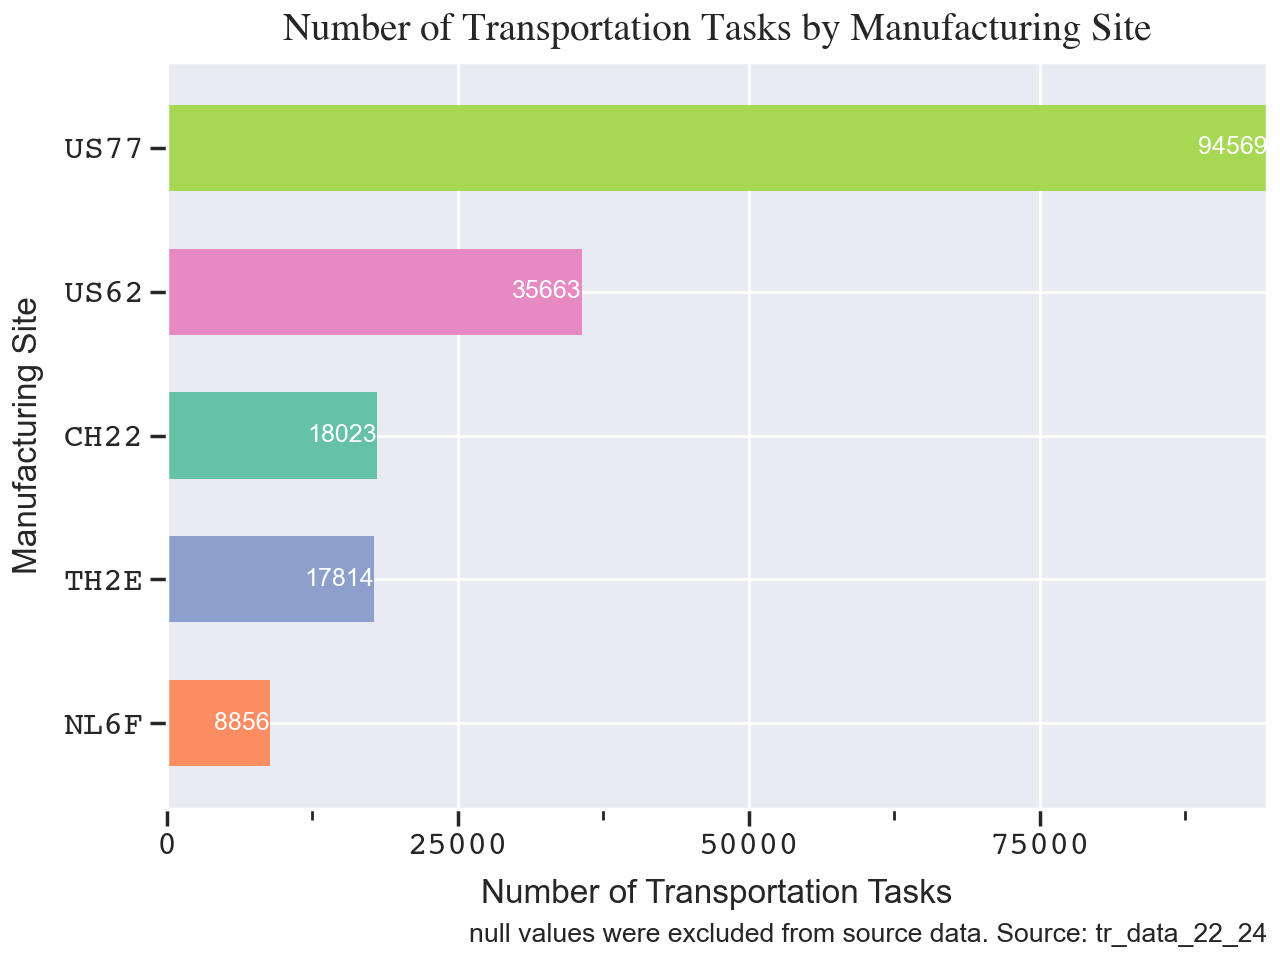

In [75]:
# Drop nulls in these two columns as to avoid bias and confusion in visualization
df_q3 = df.dropna(subset=['site', 'mode'])
# defines site_counts in df for q3, converts the series into df and moves the index where
#index = site names, back into regular columns with .reset_index()
site_counts = df_q3['site'].value_counts().reset_index()
#renames the column names to 'site' and 'task_count'
site_counts.columns = ['site', 'task_count']
site_counts['task_count'] = site_counts['task_count'].astype(int)

threea = (
    ggplot(site_counts,
           aes(x='reorder(site, task_count)', y='task_count', fill='site'))
    + geom_col(width=0.6)                             
    + coord_flip()                                   
    + scale_y_continuous(expand=(0, 0))               
    + scale_fill_brewer(type='qual', palette='Set2')  
    + theme_seaborn()
    + theme(
        axis_text_x=element_text(size=12, family="Courier", face="bold"),
        axis_text_y=element_text(size=12, family="Courier", face="bold"),
        plot_title=element_text(size=14, lineheight=.5, family="Times", face="bold.italic")
    )
        + geom_text(
        aes(label='task_count'),
        va='center',
        ha='right',             
        nudge_y=-0.2,           
        color='white',          
        size=9,
        format_string='{:.0f}'
    )
    
    + labs(
        title='Number of Transportation Tasks by Manufacturing Site',
        x='Manufacturing Site',
        y='Number of Transportation Tasks',
        caption="null values were excluded from source data. Source: tr_data_22_24"
    )
    + guides(fill=False)
)

threea


### Visualization confirmed that transportation task by manufacturing site is the most for manufacturing site US77 where a total number of transportation tasks occurred at that site 113,727 times (out of 208,157, or 54.6% of them) and the least amount of transportation tasks occurred at site ‘NL6F’ where only 12,246 (out of 208,157, or 5.8% of them) transportation tasks occurred at that site.

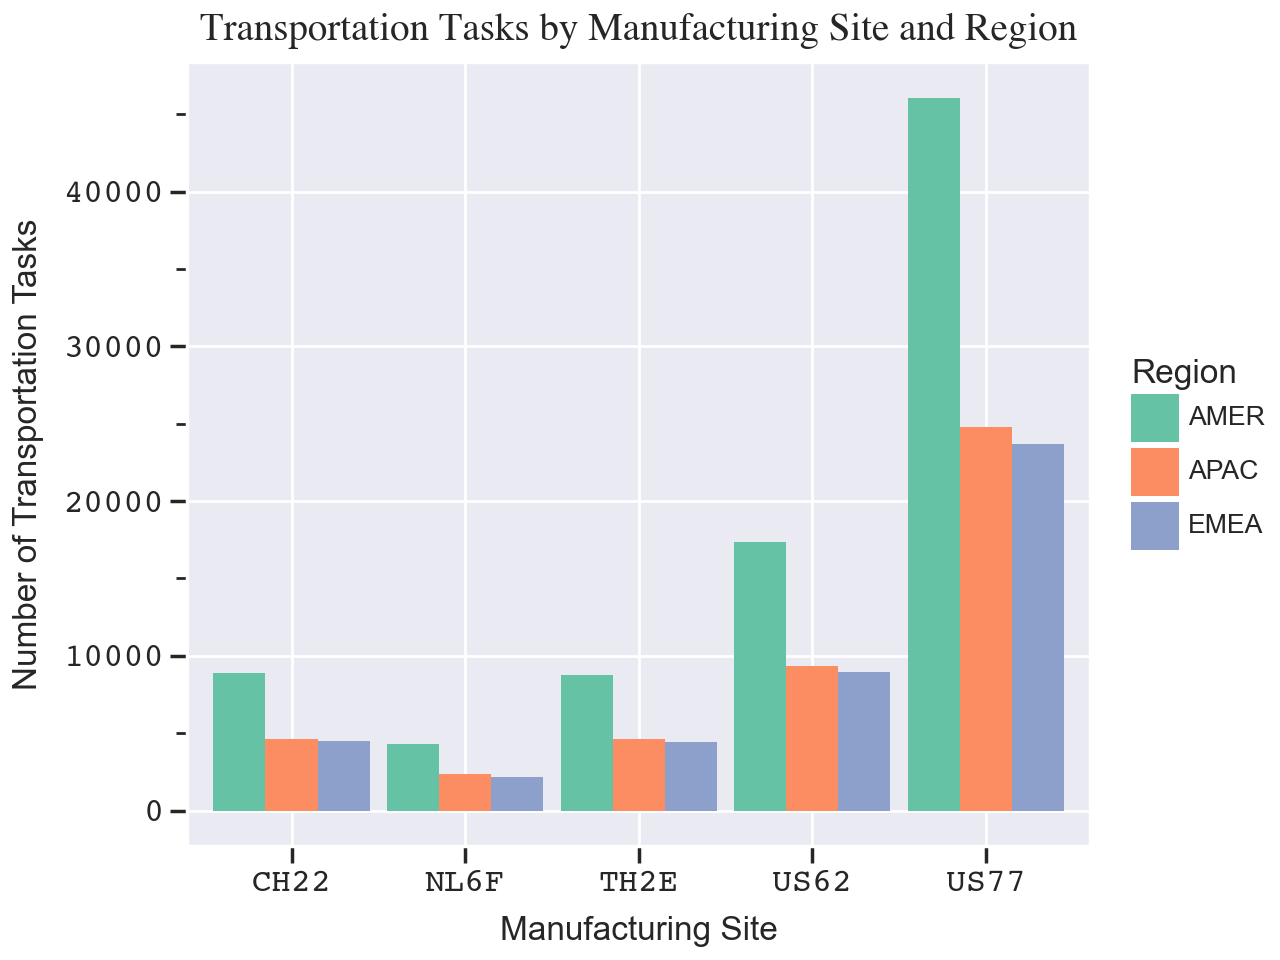

In [76]:
df_q3 = df.dropna(subset=['site', 'mode'])
site_region_counts = df_q3.groupby(['site', 'region']).size().reset_index(name='task_count')
threeb = (ggplot(site_region_counts, aes(x='site', y='task_count', fill='region'))
     + geom_bar(stat='identity', position='dodge')
     + scale_fill_brewer(type='qual', palette='Set2')
     + theme_seaborn()
     + theme(axis_text_x=element_text(size=12, family= "Courier",face="bold"),
                axis_text_y=element_text(size=12, family= "Courier",face="bold"),
                plot_title=element_text(size=14, lineheight= .5, family= "Times", face="bold.italic"))
     + labs(title='Transportation Tasks by Manufacturing Site and Region',
            x='Manufacturing Site',
            y='Number of Transportation Tasks',
            fill='Region'))


threeb + scale_y_continuous(labels= 'ScaleLabelsUser')
threeb

### I then confirmed through visualization transportation tasks broken down by region, where I found that transportation tasks came from region ‘AMER’ far more than the other two regions.

## Transportation Mode Most Utilized

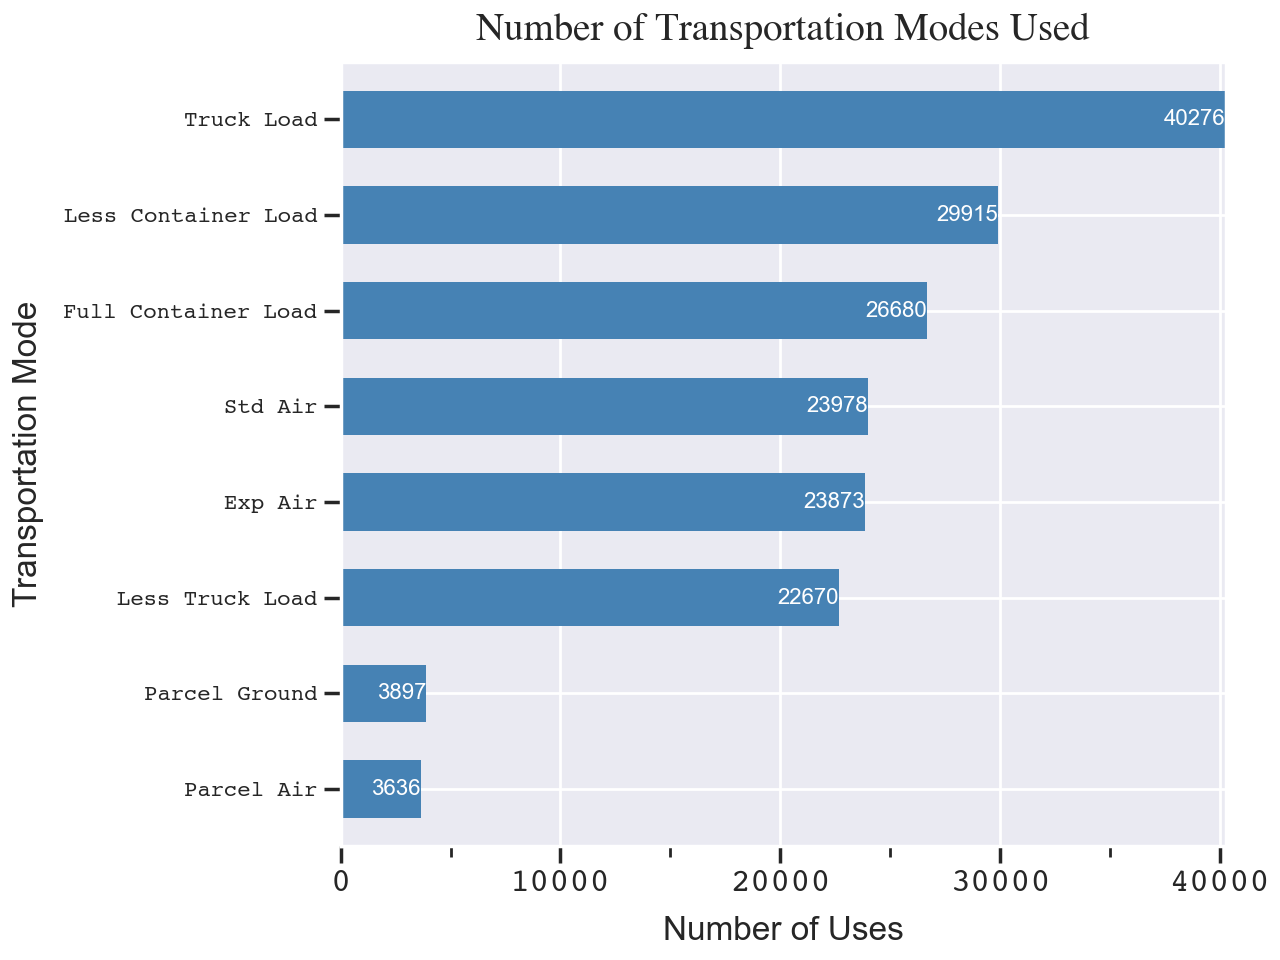

In [77]:
df_q3 = df.dropna(subset=['site', 'mode'])
mode_counts = df_q3['mode'].value_counts().reset_index()
mode_counts.columns = ['mode', 'use_count']
threec = (
    ggplot(mode_counts, aes(x='reorder(mode, use_count)', y='use_count', fill='mode'))
    + geom_col(width=0.6, fill='steelblue')
    + coord_flip()
    + scale_y_continuous(expand=(0, 0))
    + scale_fill_brewer(type='qual', palette='Set2')
    + theme_seaborn()
    + theme(
        axis_text_x=element_text(size=12, family="Courier", face="bold"),
        axis_text_y=element_text(size=8, family="Courier", face="bold"),
        plot_title=element_text(size=14, lineheight=.5, family="Times", face="bold.italic")
    )
    # clean, centered value labels
    + geom_text(
        aes(label='use_count'),
        va='center',
        ha='right',            
        nudge_y=-0.2,          
        color='white',
        size=8,
        format_string='{:.0f}'
    )
    + labs(
        title='Number of Transportation Modes Used',
        x='Transportation Mode',
        y='Number of Uses'
    )
)

threec

### It was found that TL and Less Than Container Load are the most commonly used transportation modes and parcel air and parcel ground are the least utilized.

## Distribution of delays across regions and sites

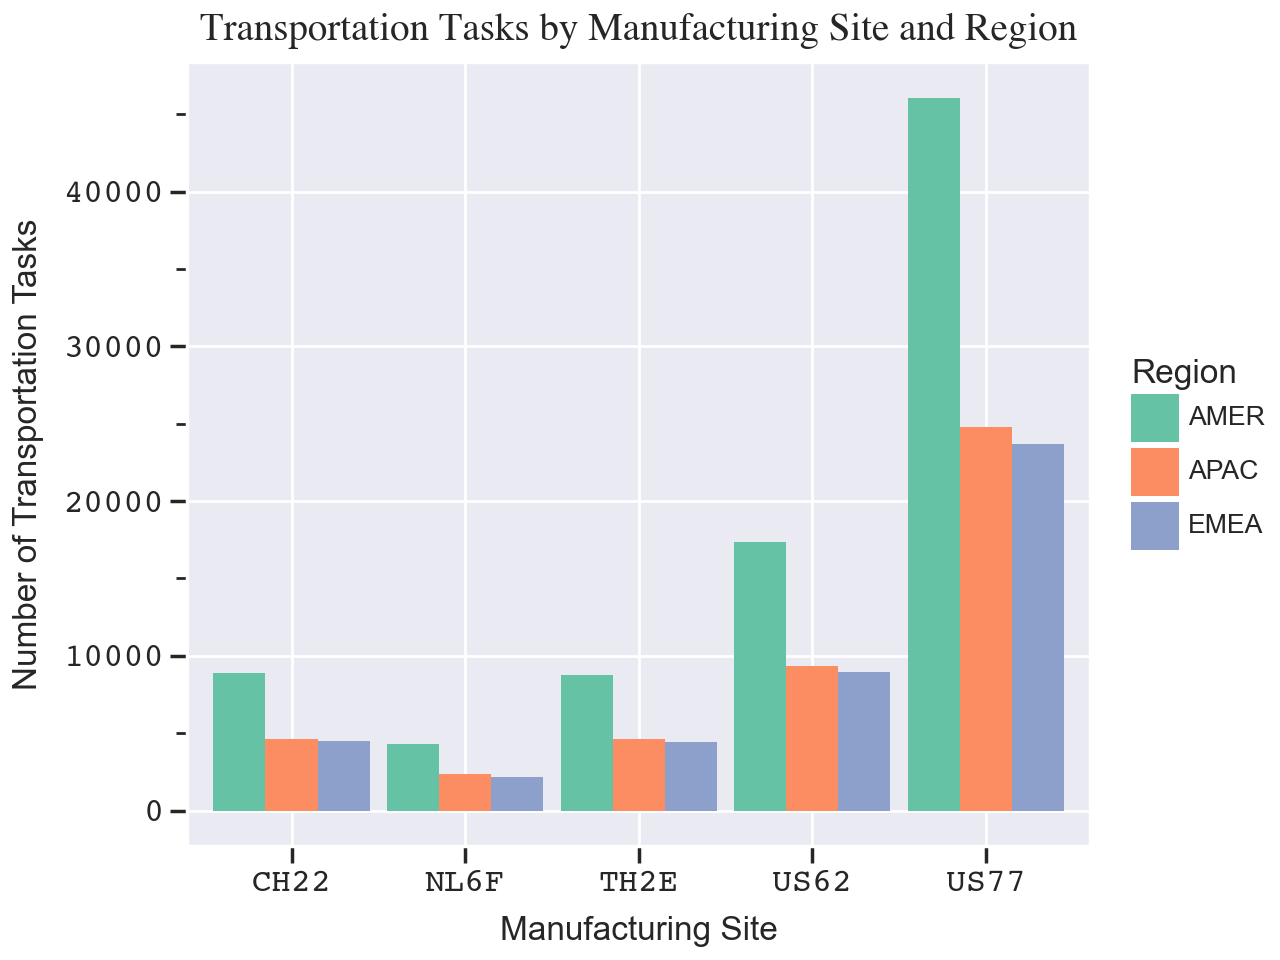

In [78]:
df_q3 = df.dropna(subset=['site', 'mode'])
site_region_counts = df_q3.groupby(['site', 'region']).size().reset_index(name='task_count')
threeb = (ggplot(site_region_counts, aes(x='site', y='task_count', fill='region'))
     + geom_bar(stat='identity', position='dodge')
     + scale_fill_brewer(type='qual', palette='Set2')
     + theme_seaborn()
     + theme(axis_text_x=element_text(size=12, family= "Courier",face="bold"),
                axis_text_y=element_text(size=12, family= "Courier",face="bold"),
                plot_title=element_text(size=14, lineheight= .5, family= "Times", face="bold.italic"))
#leaving out geom text for bar labels, due to overlapping, and I can't seem to fix it.
     + labs(title='Transportation Tasks by Manufacturing Site and Region',
            x='Manufacturing Site',
            y='Number of Transportation Tasks',
            fill='Region'))


threeb + scale_y_continuous(labels= 'ScaleLabelsUser')
threeb

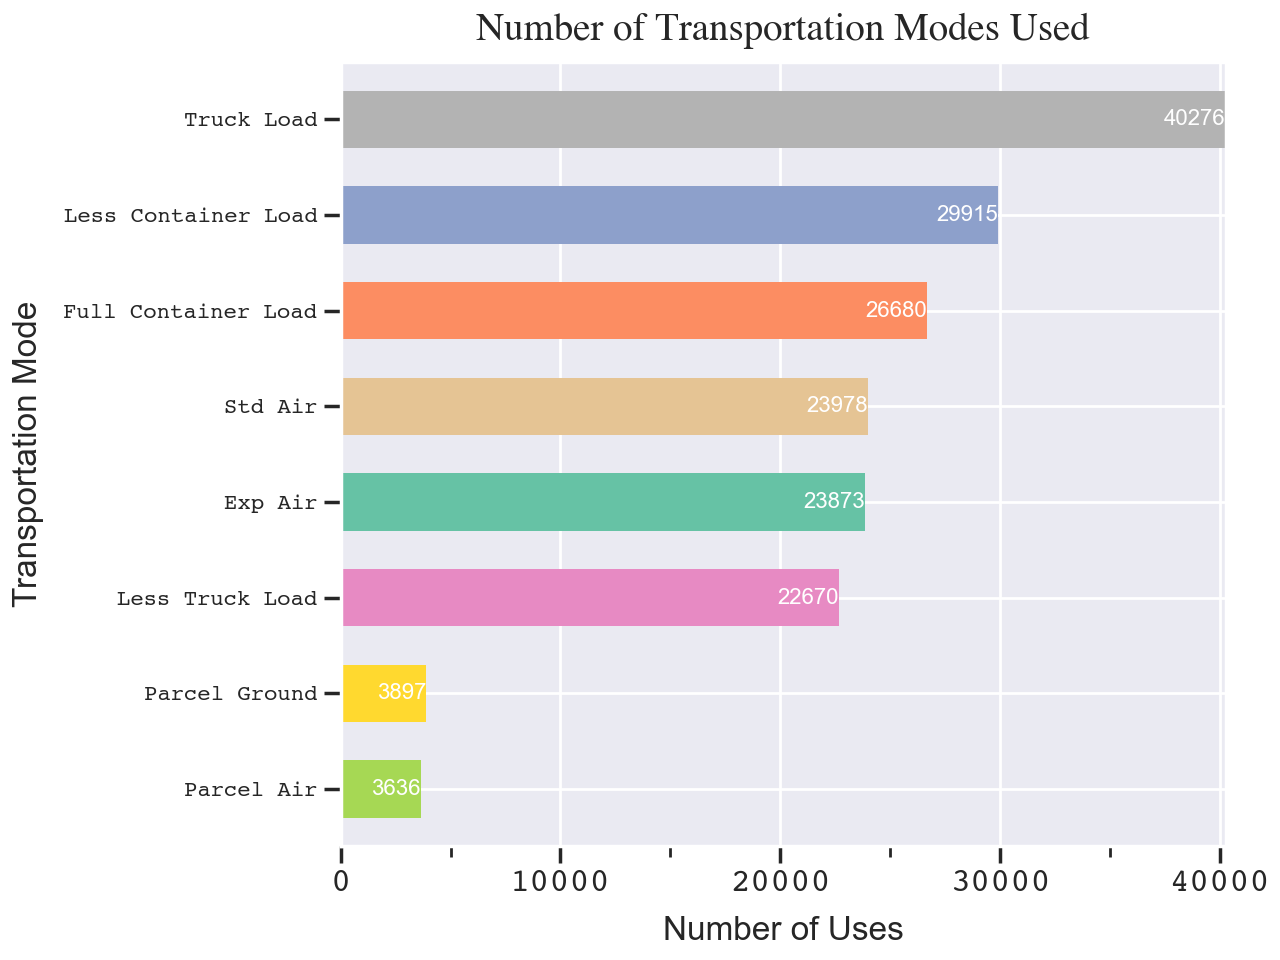

In [79]:
df_q3 = df.dropna(subset=['site', 'mode'])
mode_counts = df_q3['mode'].value_counts().reset_index()
mode_counts.columns = ['mode', 'use_count']
threec = (
    ggplot(mode_counts, aes(x='reorder(mode, use_count)', y='use_count', fill='mode'))
    + geom_col(width=0.6)
    + coord_flip()  
    + scale_y_continuous(expand=(0, 0))
    + scale_fill_brewer(type='qual', palette='Set2')
    + theme_seaborn()
    + theme(
        axis_text_x=element_text(size=12, family="Courier", face="bold"),
        axis_text_y=element_text(size=8, family="Courier", face="bold"),
        plot_title=element_text(size=14, lineheight=.5, family="Times", face="bold.italic")
    )
    + geom_text(
        aes(label='use_count'),
        va='center',
        ha='right',            
        nudge_y=-0.2,          
        color='white',
        size=8,
        format_string='{:.0f}'
    )
    + labs(
        title='Number of Transportation Modes Used',
        x='Transportation Mode',
        y='Number of Uses'
    )
    + guides(fill=False)
)

threec

## Delay Analysis

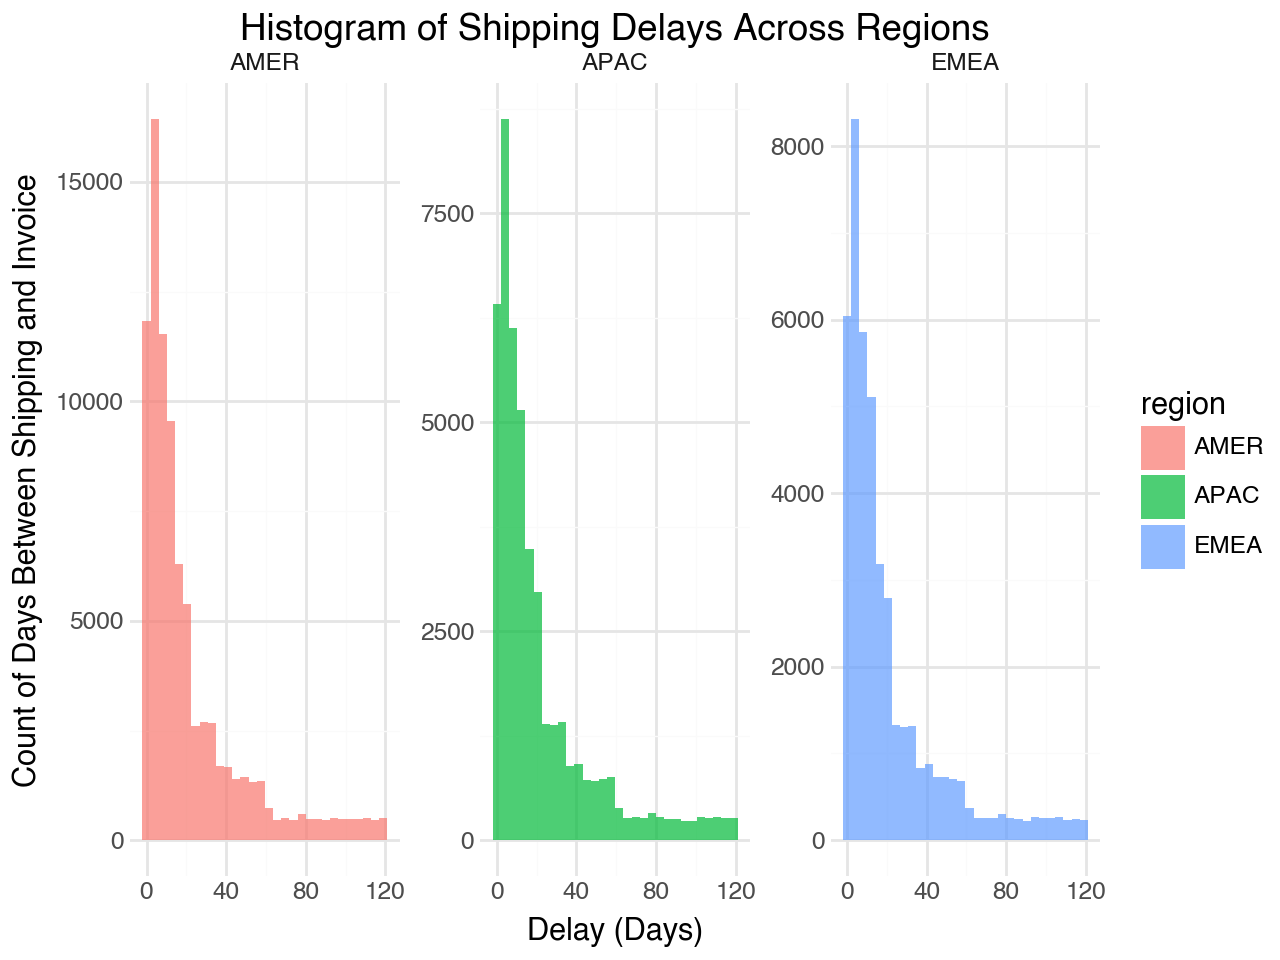

In [80]:
(
    ggplot(df, aes(x='Delay_Days', fill='region')) +
    geom_histogram(bins=30, alpha=0.7, position='identity') +
    facet_wrap('~region', scales='free_y') +
    labs(title='Histogram of Shipping Delays Across Regions',
         x='Delay (Days)',
         y='Count of Days Between Shipping and Invoice') +
    theme_minimal()
)

### The histogram above shows the count of shipments binned by delay days, overlaid transparently to compare distributions across regions (EMEA, APAC, AMER). This visualizes a smoothed estimate of the probability distribution. Both reveal that delays are similar across regions, with a mean around 20 days and skewed right (most delays are short, but some surpass 120 days). Peaks occur around 5-12 days, with the right tails for longer delays. There are no major differences between regions, suggesting delay patterns are consistent across regions.

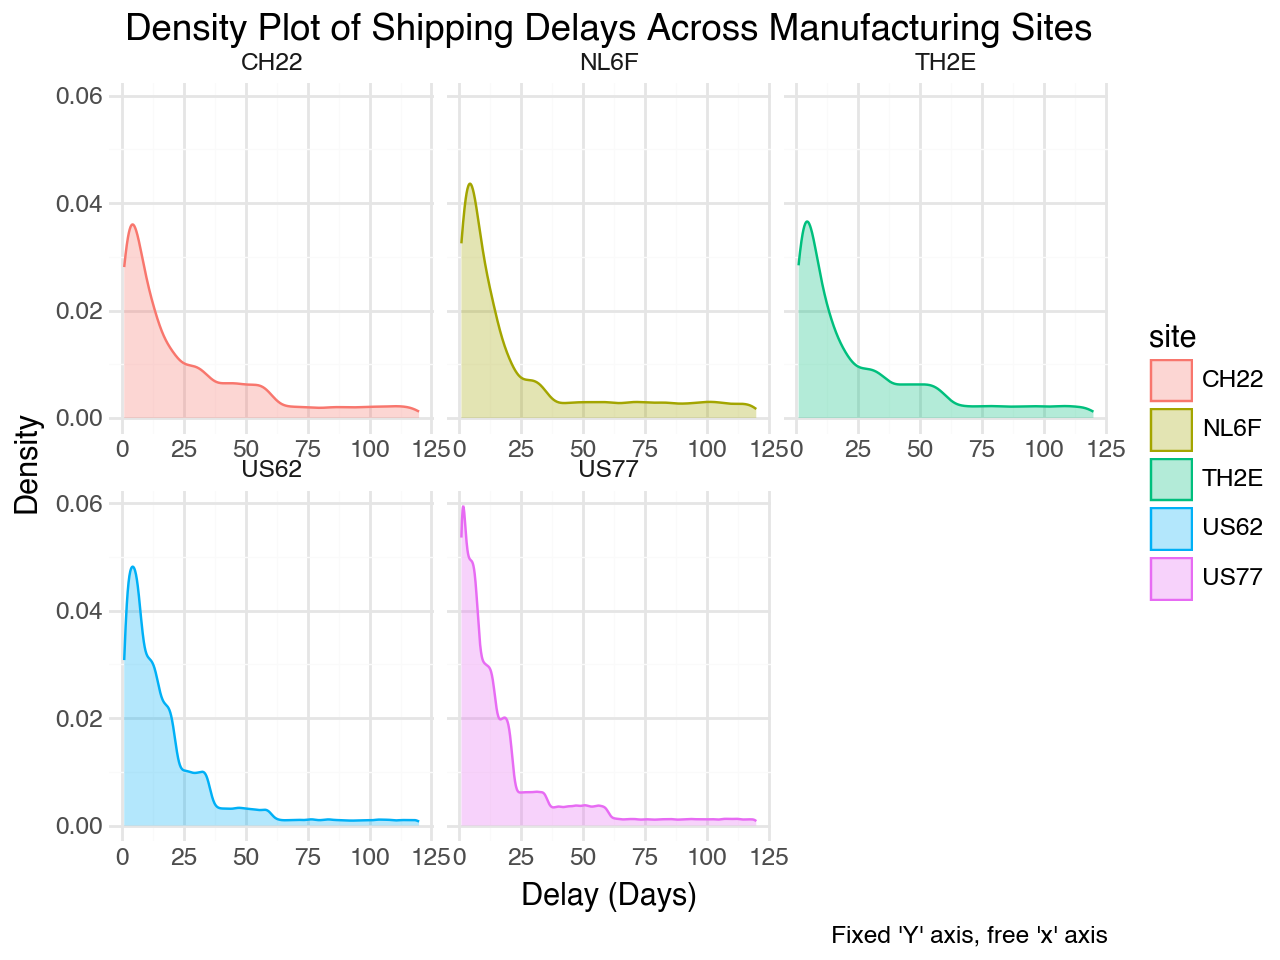

In [81]:
(
    ggplot(df, aes(x='Delay_Days', color='site', fill='site')) +
    geom_density(alpha=0.3) +
    facet_wrap('~site', scales='free_x') +
    labs(
        title='Density Plot of Shipping Delays Across Manufacturing Sites',
        x='Delay (Days)',
        y='Density',
        caption="Fixed 'Y' axis, free 'x' axis"
    ) +
    theme_minimal()
)

### The histogram and density plots for sites (US77, US62, TH2E, CH22, NL6F) show more variation than by region. US-based sites (US77 and US62) have shorter delays, with means around 19 days and tighter distributions (less spread, peaking at 5-12 days). Overseas sites (TH2E, CH22, NL6F) exhibit longer delays, with means around 26-27 days and broader spreads (more frequent long tails up to 120 days). This suggests site-specific factors, such as location or operational differences, influence delays—possibly due to longer supply chains or processing times at non-US sites.

## Relationship Between Delay and Invoice Amount?

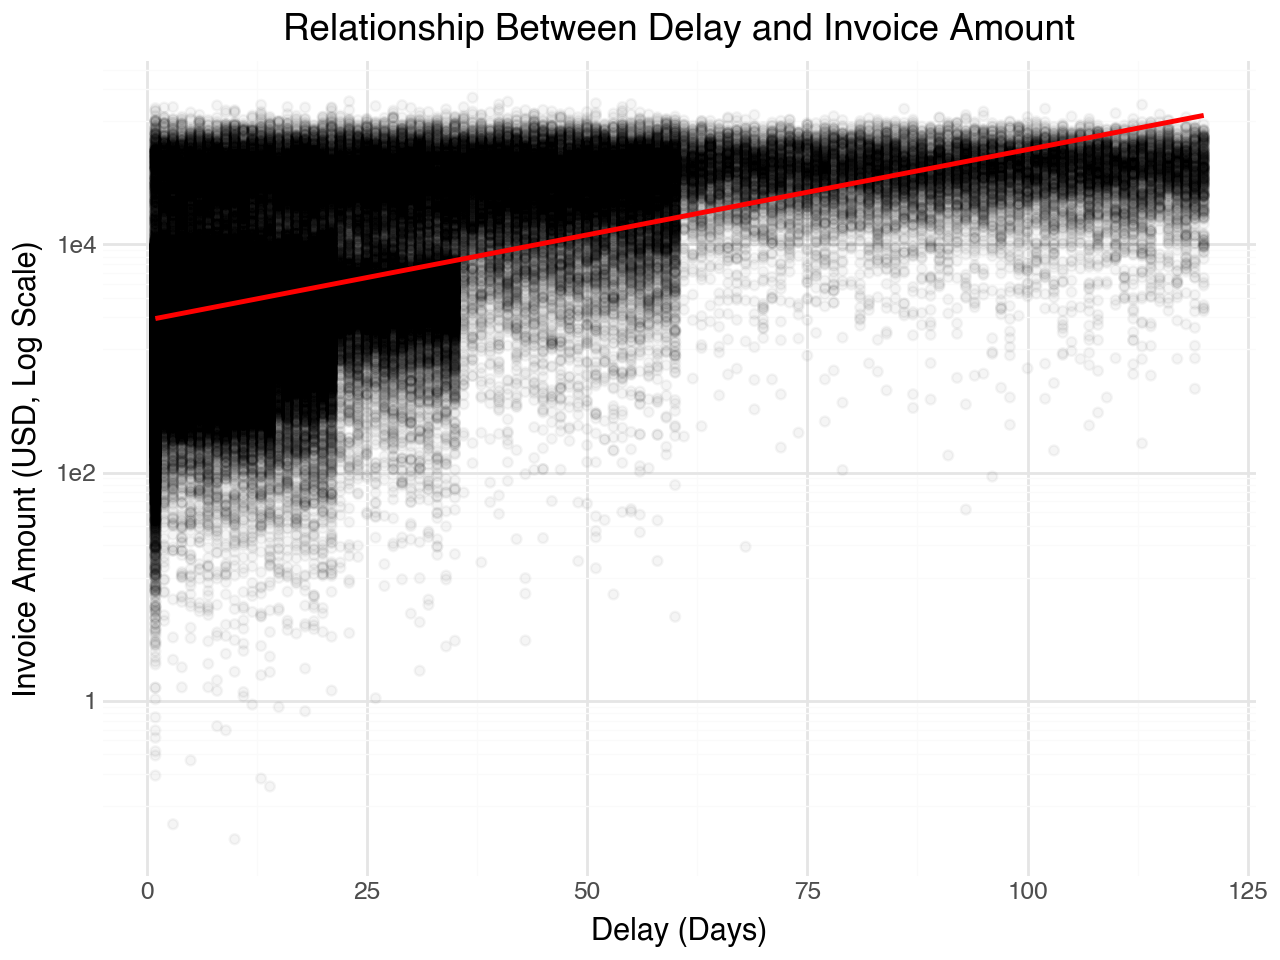

In [82]:
(
    ggplot(df, aes(x='Delay_Days', y='usda_invoice_amount')) +
    geom_point(alpha=0.04) +
    geom_smooth(method='lm', color='red') +
    scale_y_log10() +
    labs(title='Relationship Between Delay and Invoice Amount',
         x='Delay (Days)',
         y='Invoice Amount (USD, Log Scale)') +
    theme_minimal()
)

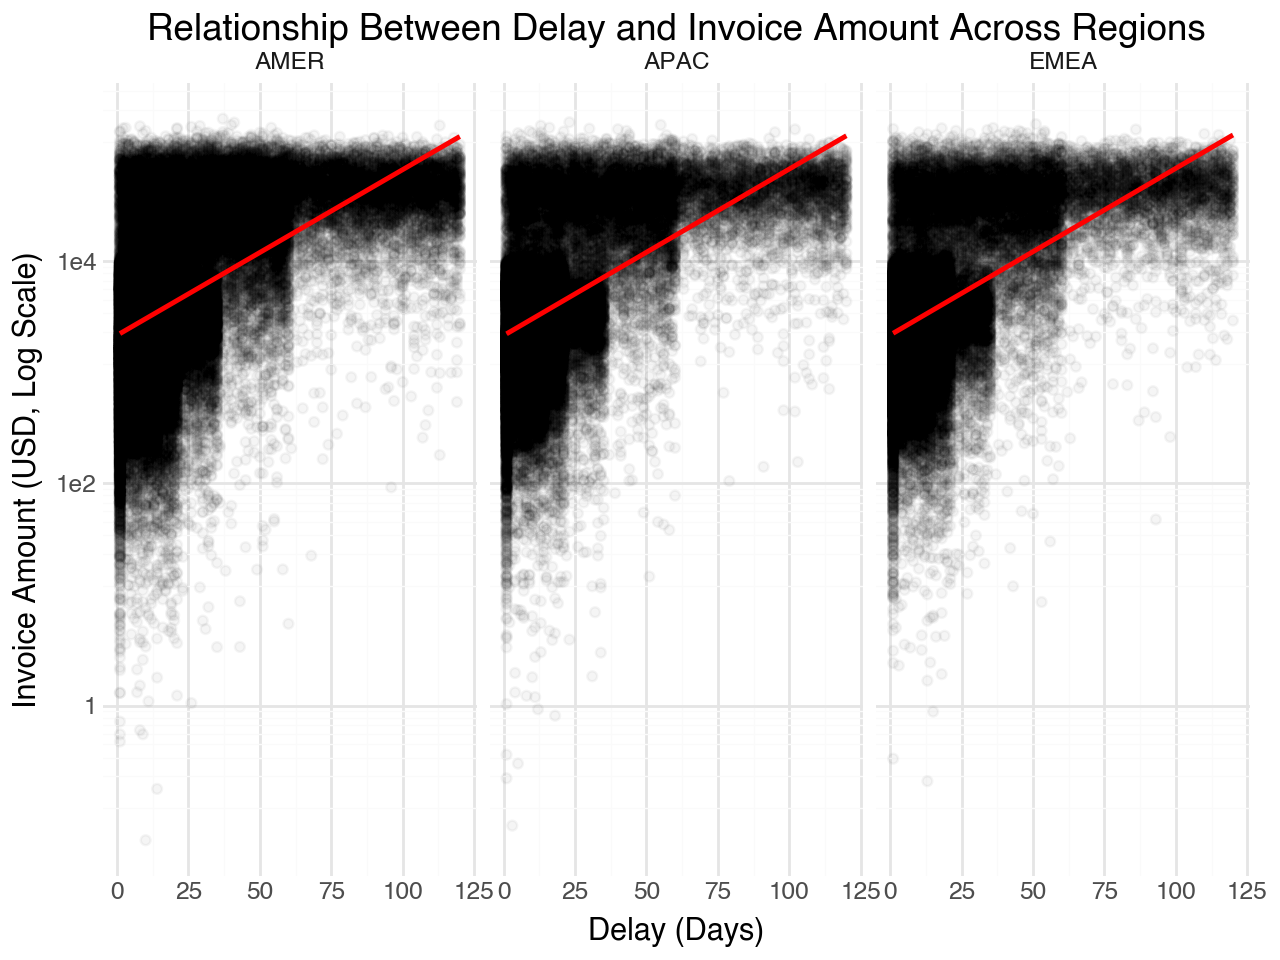

In [83]:
(
    ggplot(df, aes(x='Delay_Days', y='usda_invoice_amount')) +
    geom_point(alpha=0.04) +
    geom_smooth(method='lm', color='red') +
    facet_wrap('~region') +
    scale_y_log10() +
    labs(title='Relationship Between Delay and Invoice Amount Across Regions',
         x='Delay (Days)',
         y='Invoice Amount (USD, Log Scale)') +
    theme_minimal()
)

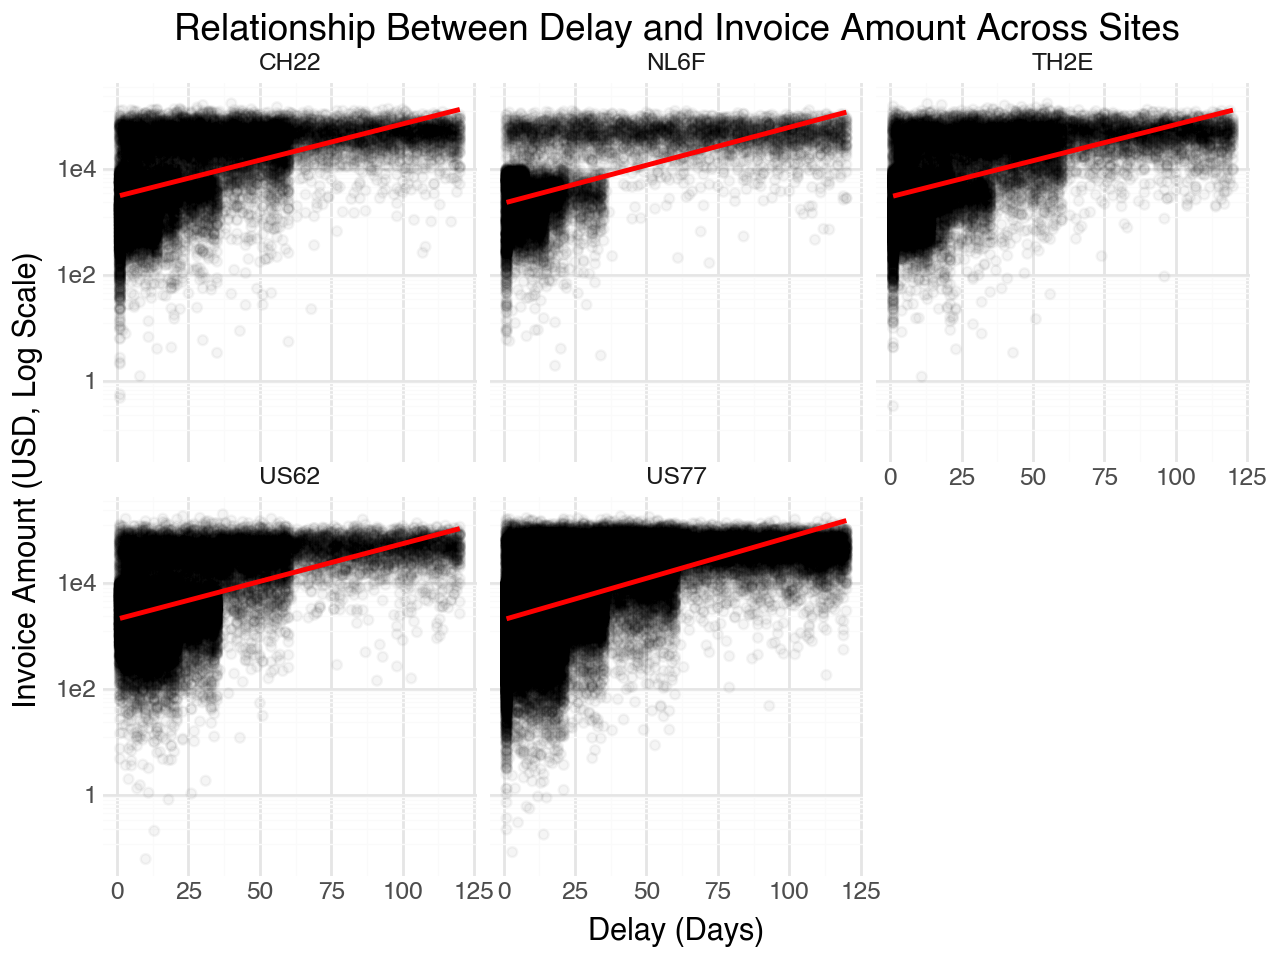

In [84]:
(
    ggplot(df, aes(x='Delay_Days', y='usda_invoice_amount')) +
    geom_point(alpha=0.04) +
    geom_smooth(method='lm', color='red') +
    facet_wrap('~site') +
    scale_y_log10() +
    labs(title='Relationship Between Delay and Invoice Amount Across Sites',
         x='Delay (Days)',
         y='Invoice Amount (USD, Log Scale)') +
    theme_minimal()
)

### Across sites, the positive relationship persists, but this is a bit different. See, the US sites (US77, US62) show steeper trends, while overseas sites (TH2E, CH22, NL6F) have flatter slopes. This aligns with longer delays at overseas sites potentially involving higher shipment amounts, but the link is weaker, maybe because of site-specific invoicing practices.

## Delay By Transportation Mode

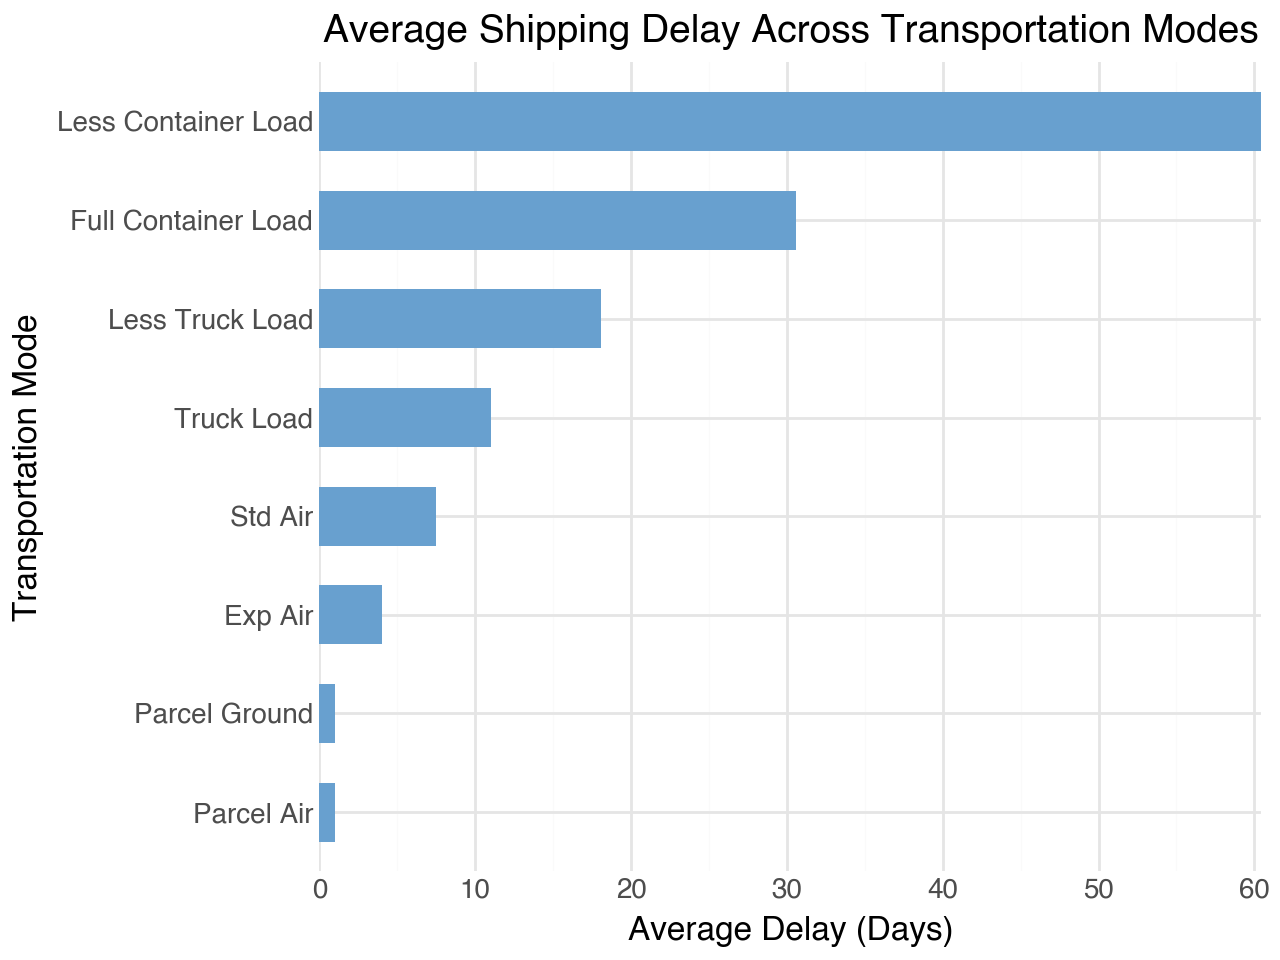

In [85]:
df['shipping_date'] = pd.to_datetime(df['shipping_date'])
df['invoice_date'] = pd.to_datetime(df['invoice_date'])
df['Delay_Days'] = (df['invoice_date'] - df['shipping_date']).dt.days

summary = (
    df.groupby('mode', as_index=False)['Delay_Days']

    .mean()

    .sort_values('Delay_Days', ascending=True)
)

summary['mode'] = pd.Categorical(summary['mode'],

                                 categories=summary['mode'])

plotfive = (
    ggplot(summary, aes(x='mode', y='Delay_Days'))
    + geom_col(width=0.6, fill='#68a0cf') # geom_col == bar with stat='identity'
    + coord_flip() 
    + scale_y_continuous(expand=(0, 0))
    + labs(title='Average Shipping Delay Across Transportation Modes',
           x='Transportation Mode',
           y='Average Delay (Days)')
    + theme_minimal()
    + theme(
        axis_text_y=element_text(size=10, ha='right'),
        axis_text_x=element_text(size=10),
        axis_title=element_text(size=12),
        plot_title=element_text(size=14, ha='center')
    )
)
plotfive

Unique modes: ['Std Air' 'Full Container Load' 'Exp Air' 'Truck Load'
 'Less Container Load' 'Less Truck Load' 'Parcel Air' 'Parcel Ground']


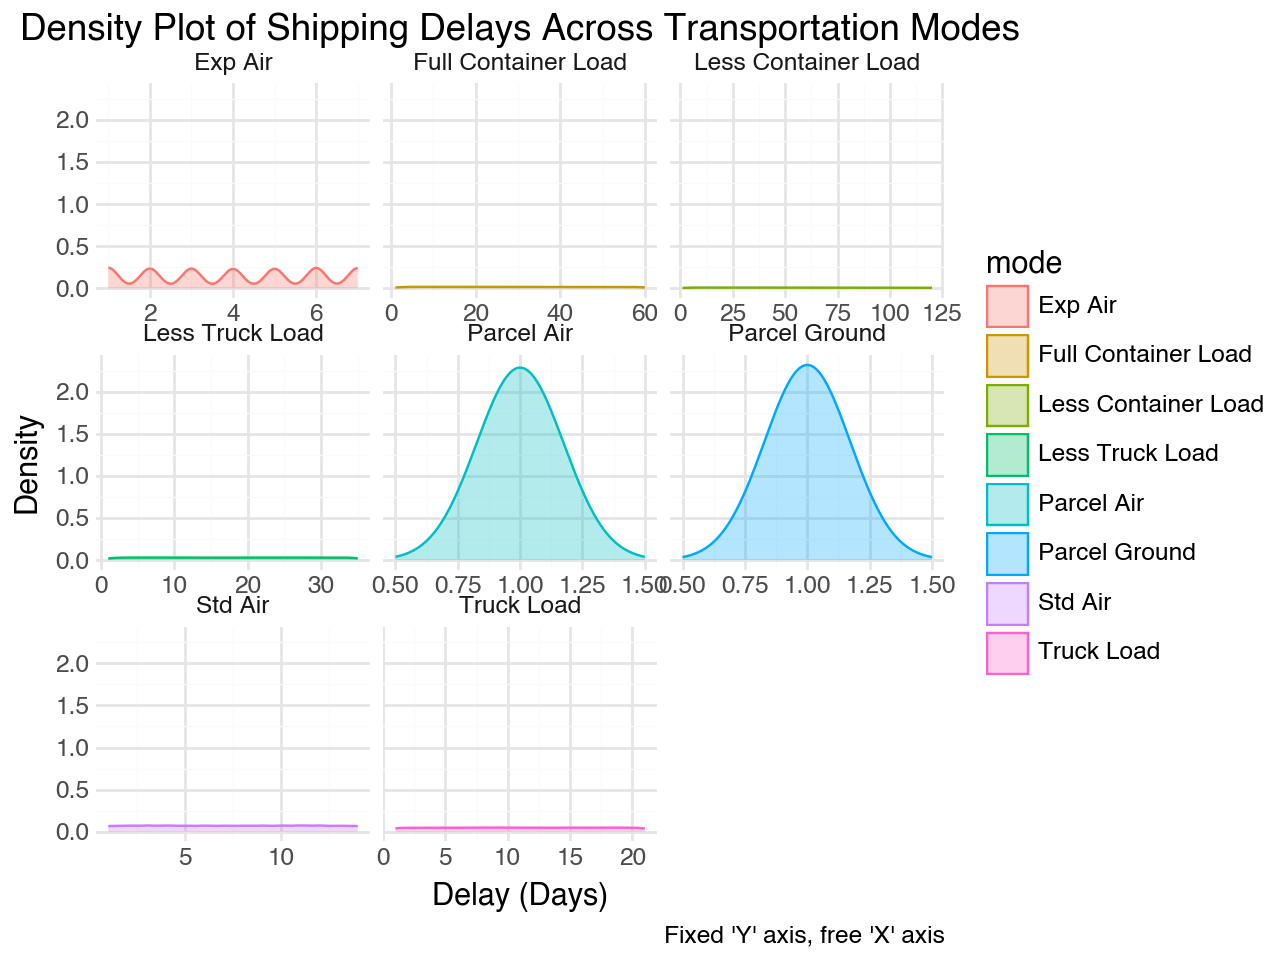

In [86]:
df['shipping_date'] = pd.to_datetime(df['shipping_date'])
df['invoice_date'] = pd.to_datetime(df['invoice_date'])
df['Delay_Days'] = (df['invoice_date'] - df['shipping_date']).dt.days

# Filter out rows where 'mode' is NaN
df = df.dropna(subset=['mode'])

#Check unique values in 'mode' column.. this won't be averages like the above plot.
print("Unique modes:", df['mode'].unique())

# Density plot faceted by mode
plotfive_b = (
    ggplot(df, aes(x='Delay_Days', color='mode', fill='mode')) +
    geom_density(alpha=0.3) +
    facet_wrap('~mode', scales='free_x') +
    labs(
        title='Density Plot of Shipping Delays Across Transportation Modes',
        x='Delay (Days)',
        y='Density',
        caption="Fixed 'Y' axis, free 'X' axis"
    ) +
    theme_minimal()
)
plotfive_b

## Key Insights:

* parcel_air and parcel_grund exhibit a sharp peak at 1 day, meaning a consistant nominal delay, likely due to efficient parcel handling.

* exp_air and other peak around 4 days with narrow spreads, reflecting stable and quick air or miscellaneous methods.
* std_air (around 8 days) and truck_load (around 11 days) show moderate spreads in their distribution, suggesting some variability in processing times.
* less_truck_load (around 18 days) has a wider distribution, indicating greater variability in partial truck loads.
* full_container_load (around 31 days) and less_container_load (around 60 days) display broad curves with tails extending to 120 days, this highlights significant variability and outliers, likely from sea freight logistics challenges like customs delays.

This distribution confirms that container modes have the most variable and longest delays, which could guide operational decisions to prioritize faster modes for time-sensitive shipments.

## Next, I was asked to create a boxplot visual of delay broken down by tranportation modes using a boxplot plot, where the boxplots are ordered from largest delays to smallest days.

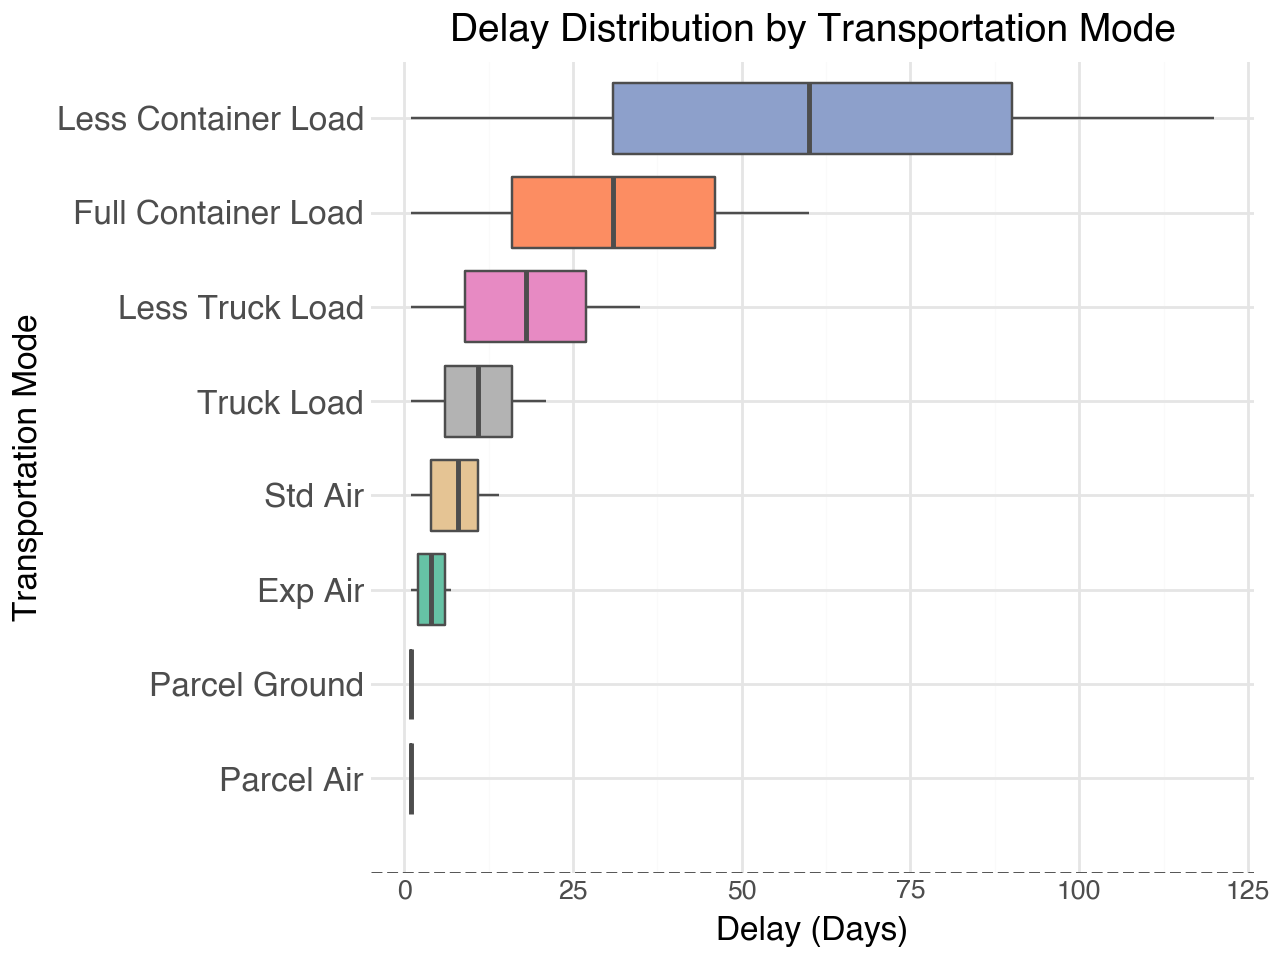

In [87]:
order = (
    df.groupby("mode")["Delay_Days"]
    .median()
    .sort_values(ascending=True)
    .index.tolist()
)
p = (
    ggplot(df, aes(x="mode", y="Delay_Days", fill="mode"))
    + geom_boxplot(outlier_shape="o", color="#4d4d4d")
    + geom_vline(xintercept=0, linetype="dashed", color="#555555", size=0.6)
    + scale_x_discrete(limits=order) 
    + scale_fill_brewer(type="qual", palette="Set2") 
    + coord_flip() 
    + labs(
        title="Delay Distribution by Transportation Mode",
        x="Transportation Mode",
        y="Delay (Days)"
    )
    + theme_minimal(base_size=12)
    + theme(
        axis_text_y=element_text(size=12),
        plot_title=element_text(weight="bold", size=14, ha="center"),
        axis_title_x=element_text(weight="bold", size=12),
        axis_title_y=element_text(weight="bold", size=12),
        legend_position="none",
    )
)
p

## Cost Estimation and Forecasting

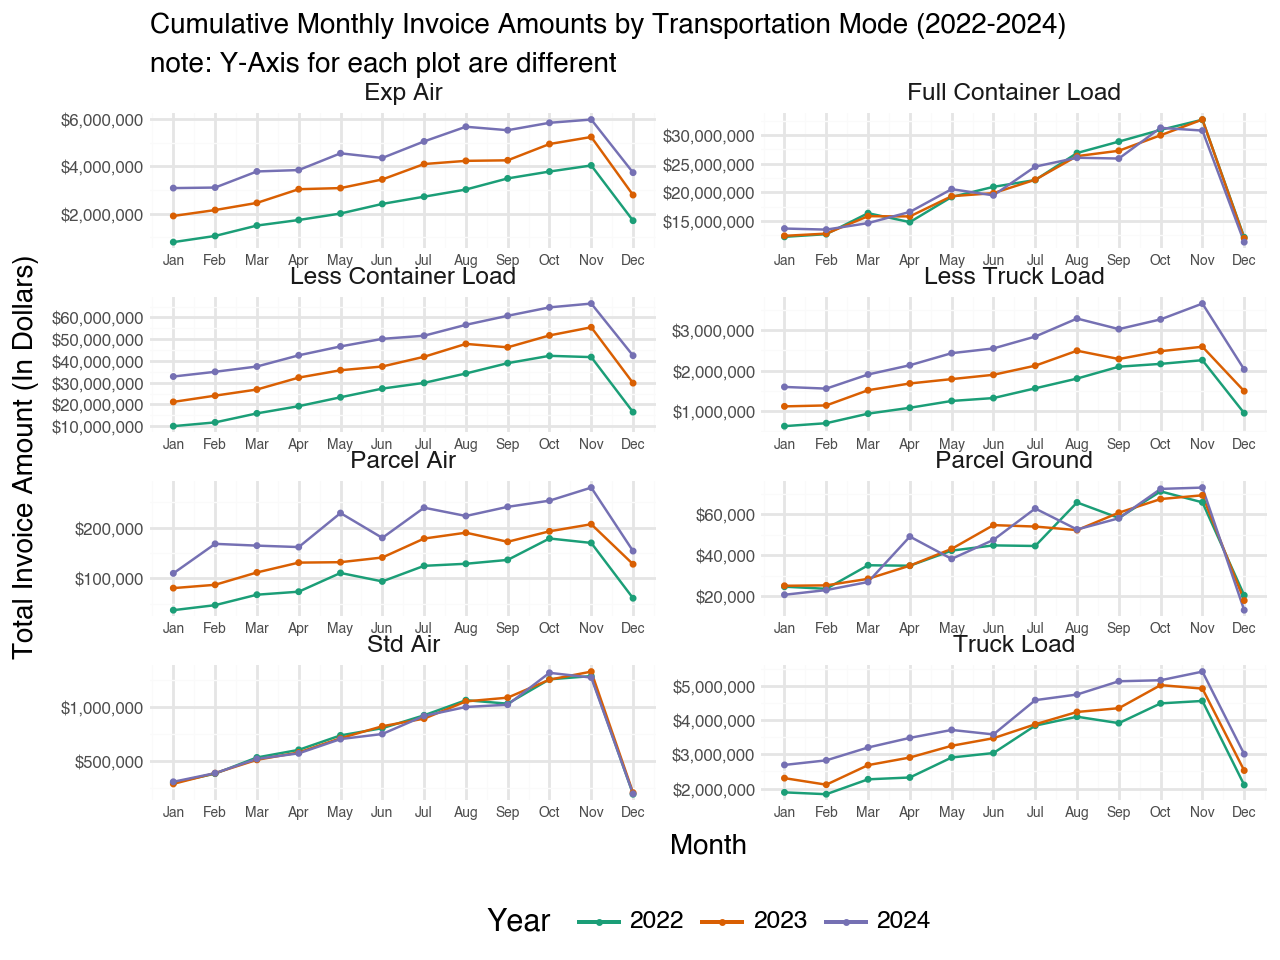

In [88]:
df = df.dropna()
df = df[df["mode"].str.lower() != "other"]
df["shipping_date"] = pd.to_datetime(df["shipping_date"])
df["year"]  = df["shipping_date"].dt.year
df["month"] = df["shipping_date"].dt.month
mode_month_total = (
    df.groupby(["mode", "year", "month"])["usda_invoice_amount"]
      .sum()
      .reset_index()
      .sort_values(["mode", "year", "month"])
)
mode_month_total["year"] = mode_month_total["year"].astype(str)
p_mode_facet = (
    ggplot(mode_month_total, aes(x="month", y="usda_invoice_amount",
                                 color="year", group="year"))
    + geom_line(size=0.5)
    + geom_point(size=0.4)
    + scale_x_continuous(
        breaks=list(range(1, 13)),
        labels=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
    )
    + scale_y_continuous(labels=lambda x: [f"${val:,.0f}" for val in x])
    + scale_color_brewer(type="qualitative", palette=2)
    + facet_wrap("mode", ncol=2, scales="free")
    + labs(
        title="Cumulative Monthly Invoice Amounts by Transportation Mode (2022-2024)",
        subtitle="note: Y-Axis for each plot are different",
        x="Month",
        y="Total Invoice Amount (In Dollars)",
        color="Year"
    )
    + theme_minimal(base_size=11)
    + theme(
        plot_title=element_text(size=10, face="bold"),
        plot_subtitle=element_text(size=10),
        axis_title_x=element_text(size=10, face="bold"),
        axis_title_y=element_text(size=10, face="bold"),
        axis_text_x=element_text(size=5),
        axis_text_y=element_text(size=6, face="bold"),
        legend_position="bottom"
    )
)
p_mode_facet



### When comparing the trend and seasonality (broken down by mode) there are a few areas to note of differances. Let's break them down one by one (as they compare to the visual is 2C. Let's refer to that visual as '2C').

* Exp_air: this follows relatively the same upward trend and growth year over year, similar to 2C with pronounced seasonality in November to December which I hopothosize is the peak logistics season (fall of each year). Oddly though, 2024 seemed to dip in the following months: March to May, and then May to July dipped and then came back up.

* Full_container_load: unlike 2C, where each year shows year over year growth, full_container_load shows an odd trend altogether. In September 2022 (green line), invoice totals surpass both 2023 and 2024, suggesting that 2022 had a very strong peak in August and September. In contrast, the 2023 and 2024 lines rise more gradually, following a very similar cumulative pattern that peaks in October–November. This means 2022’s full_container_load experienced a midyear surge, while later years (2023–2024) shifted to a more consistent growth pattern. In summary, rather than mimicing the trend behavior in 2C, full_container_load actually breaks from it. It should also be nothed that the year over year growth is not as pronounced, and very hard to tell any true year over year growth. 
* Less_container_load: Follows almost the exact same trend and seasonality as 2C.

* Less_truck_load: This mode shows a similar cumulative year over year growth pattern to 2C but with more moderate year-over-year increases. There’s still clear seasonality — activity picks up from summer through late fall, but the peak months vary between years, showing some inconsistency relative to 2C’s steady climb.

* Parcel_air: This mode differs significantly from 2C. Rather than showing a steady cumulative rise through the year, parcel_air is quite variable throughout the year, especially in 2024. Mid-year spikes (peak in May then sharp dip in June). To me, this indicates irregular driven demand, not the smooth, predictable buildup seen in 2C. This mode has a more volatile short-term shipping demand, rather than consistent volume growth year over year.

* Parcel_ground: This mode is similar to full_container_load, where there is an overall trend upward from January to November with a sharp decline in December; However there is not a consistant year over year growth and is quite volitile in the upward trend throughout the year.

* Std_air: follows 2C’s overall upward trajectory where there is a steady climb through the year. However, with year-over-year growth there is almost no visible increase in invoice amounts across all three years, suggesting a flat rate that doesn't change much. Seasonal increases occur in Q4, aligning with typical air freight surges in preparation for holiday or fiscal year-end shipping.

* Truck_load: Has a consistant year over year growth pattern like 2C, however a less pronounced seasonality trend. To be clear though, there is still a clear seasonal trend to TL. Another note is that the magnitude increase in the fall months is not as pronounced in TL as the magnitude between the fall months in less_truck_load and Less_container_load.

In short; the patterns do differ by transportation mode, with the following modes being different than the overall cumulaitive trend in std_air, parcel_air, Full_container_load, and less_truck_load 

The following modes are the most similar to the overall cumulative trend in : less_container_load, parcel_ground,truck_load, and exp_air.